<a href="https://colab.research.google.com/github/Difuze/Zomato-Restaurant-rating-Prediction/blob/main/Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv" , encoding = "latin-1")

### Selecting only Necessary Columns

In [ ]:
df = df[["name","online_order","book_table","rate","votes","location","rest_type","dish_liked","cuisines","approx_cost(for two people)","reviews_list","menu_item","listed_in(type)","listed_in(city)"]]

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning


In [ ]:
df["online_order"].value_counts()

Yes                                                                                                                                                                                30444
No                                                                                                                                                                                 21273
 ('Rated 4.0'                                                                                                                                                                        438
 ('Rated 5.0'                                                                                                                                                                        390
 ('Rated 3.0'                                                                                                                                                                        170
                                                                           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         55976 non-null  object
 1   online_order                 55977 non-null  object
 2   book_table                   55949 non-null  object
 3   rate                         48164 non-null  object
 4   votes                        55927 non-null  object
 5   location                     55893 non-null  object
 6   rest_type                    55676 non-null  object
 7   dish_liked                   27815 non-null  object
 8   cuisines                     55836 non-null  object
 9   approx_cost(for two people)  55519 non-null  object
 10  reviews_list                 55853 non-null  object
 11  menu_item                    51588 non-null  object
 12  listed_in(type)              51576 non-null  object
 13  listed_in(city)              51

In [ ]:
df['book_table'].value_counts()

No                                                                                                                                                                                                                                                            45268
Yes                                                                                                                                                                                                                                                            6449
 ('Rated 4.0'                                                                                                                                                                                                                                                   375
 ('Rated 5.0'                                                                                                                                                                                                               

In [ ]:
df = df[df["online_order"].isin(["Yes","No"])]

In [ ]:
df.shape

(51717, 14)

In [ ]:
df["rate"] = df["rate"].str.replace("/5" , "")

In [ ]:
df.duplicated().sum()

110

In [ ]:
df.drop_duplicates()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55977,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
55978,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
55979,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
55980,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
df = df[df["rate"] != "NEW"]

In [ ]:
df = df[df["rate"] != "-"]

In [ ]:
df["rate"] = df["rate"].astype(float)

In [ ]:
df["rate"] = df['rate'].fillna(df['rate'].mean().round(1))

In [ ]:
df.shape

(49440, 14)

In [ ]:
df["votes"] = df['votes'].astype(int)

In [ ]:
df = df.rename(columns = {"approx_cost(for two people)" : "cost" , "listed_in(type)":"type",
                     "listed_in(city)":"city" })

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df["cost"] = df['cost'].str.replace("," , "")

In [ ]:
# df['cost'].dropna(inplace = True)

In [ ]:
df["cost"] = df["cost"].fillna(df["cost"].astype(float).mean()).astype(int)

# Performing EDA

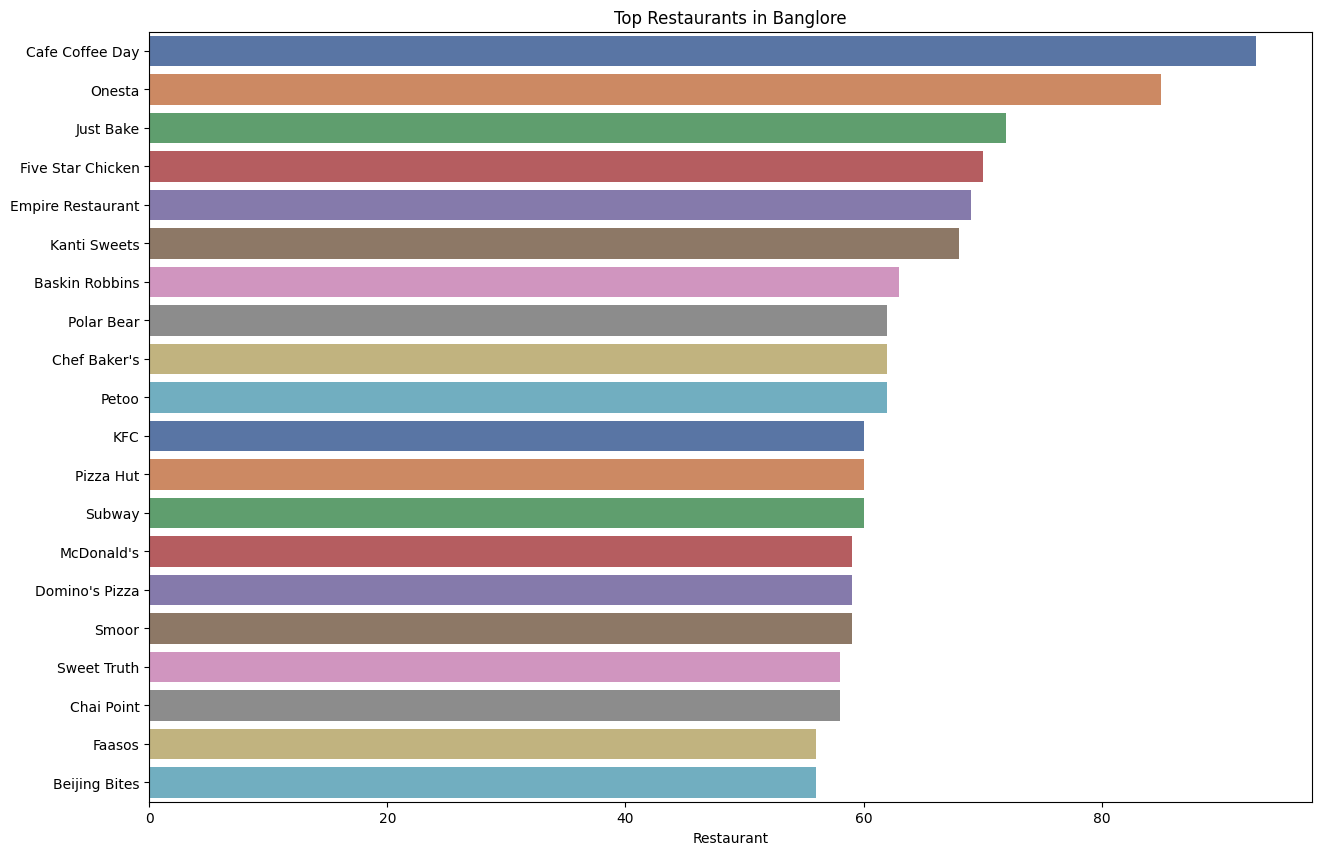

In [ ]:
# Top Restaurant that have more number of outlets in a city

plt.figure(figsize = (15 , 10))
chains = df["name"].value_counts()[:20]
sns.barplot(x = chains , y = chains.index ,  palette = "deep")
plt.title("Top Restaurants in Banglore")
plt.xlabel("Number of Outlets")
plt.xlabel("Restaurant")
plt.show()


Cafe Coffe day has most number of Outlets in Banglore City

In [ ]:
ll = df['book_table'].unique()
ll

array(['Yes', 'No'], dtype=object)

([<matplotlib.patches.Wedge at 0x79ff850559c0>,
 [Text(-1.0124825181443338, 0.4299757556561869, 'Yes'),
  Text(1.0124825382729505, -0.42997570825845915, 'No')],
 [Text(-0.5522631917150911, 0.2345322303579201, '87%'),
  Text(0.5522632026943366, -0.23453220450461407, '13%')])

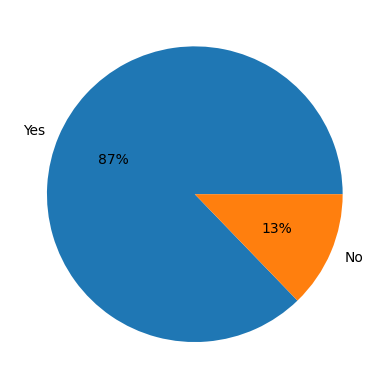

In [ ]:
tables = df["book_table"].value_counts()
plt.pie(tables , labels =  ll,autopct='%.0f%%')

Most of the Restaurants offer table bookings

Text(0.5, 1.0, 'Whether Restaurant Delivers Online or not')

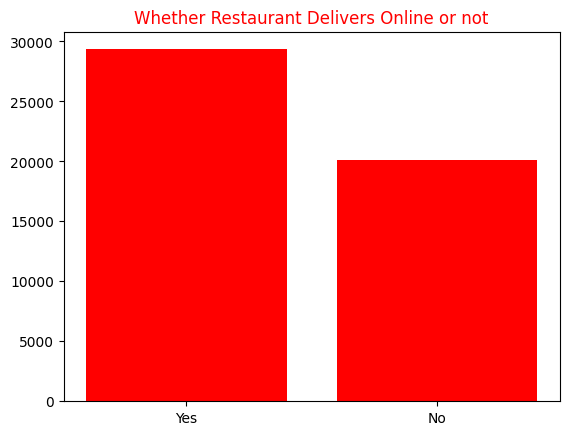

In [ ]:
online_order = df['online_order'].value_counts()
plt.bar(online_order.index , online_order.values , color = "red")
plt.title("Whether Restaurant Delivers Online or not" , color = "red")

Majority of the Restaurants Proivdes Online Order

<Figure size 2000x1200 with 0 Axes>

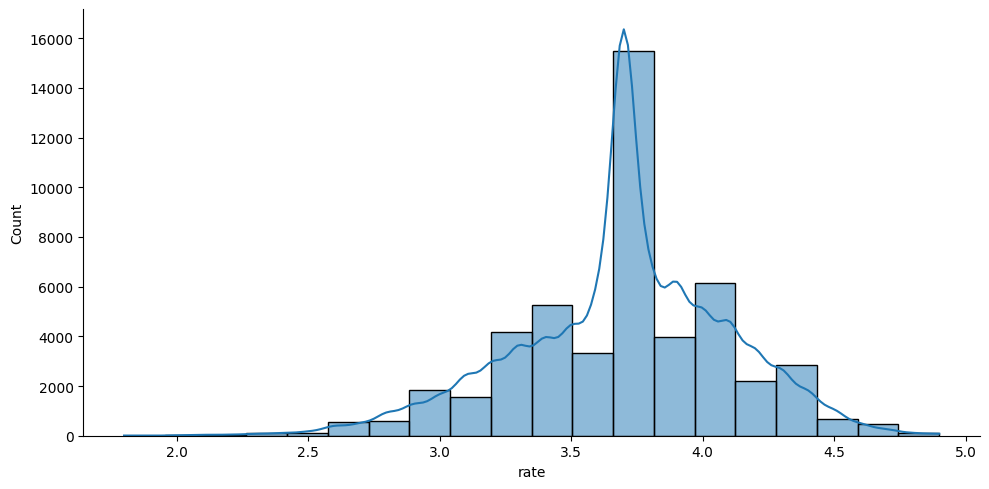

In [ ]:
# How Ratings are ditributed
plt.figure(figsize = (20 , 12))

sns.displot(df["rate"] , bins = 20 , kde = True , height=5,aspect=2 )

Most of the Ratings are between 3.0 to 4.0

In [ ]:
df["rate"].min()

1.8

In [ ]:
df['rate'].max()

4.9

Text(0.5, 1.0, 'Services Type')

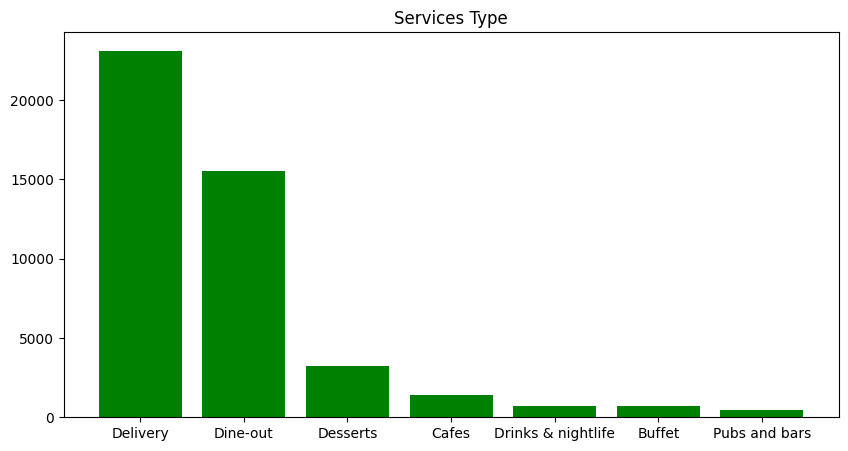

In [ ]:
restaurant_type = df['type'].value_counts()
plt.figure(figsize = (10,5))
plt.bar(restaurant_type.index , restaurant_type.values , color = "green")
plt.title("Services Type")


Most of the services are Delivery and DineOut

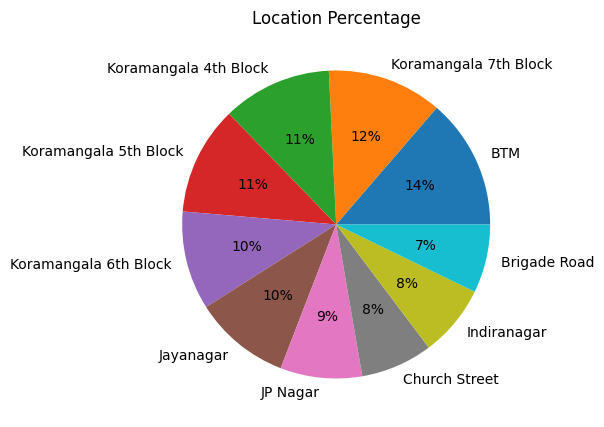

In [ ]:
# which area has maximum number of restaurants

plt.figure(figsize = (10,5))
cities = df["city"].value_counts()[:10]
plt.pie(cities , labels = cities.index , autopct = "%.0f%%")
plt.title("Location Percentage")
plt.show()

BTM has Highest number of Restaurants

Text(0.5, 1.0, 'Number of Restaurants in given location')

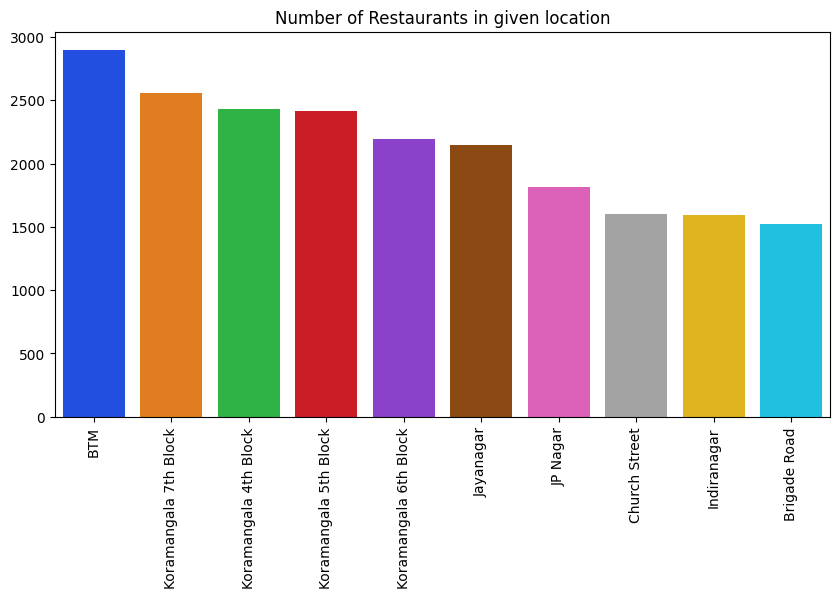

In [ ]:
# Number of Restaurants in given location
plt.figure(figsize = (10,5))
plt.xticks(rotation='vertical')
sns.barplot(x = cities.index , y = cities.values , palette = "bright")
plt.title("Number of Restaurants in given location")

Text(0.5, 1.0, 'Eating cost of Restaurants')

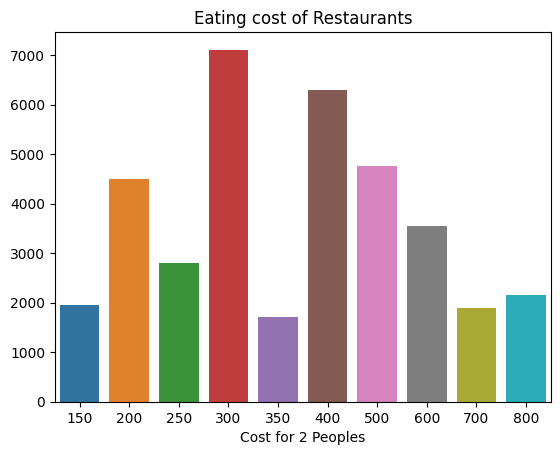

In [ ]:
cost = df['cost'].value_counts()[:10]
sns.barplot(x = cost.index , y = cost.values )
plt.xlabel("Cost for 2 Peoples")
plt.title("Eating cost of Restaurants")

300 to 400 in avg cost for 2 peoples in a Restaurants

In [ ]:
temp_df = df.sort_values(by = "cost" , ascending = False).head(10)

Text(0.5, 1.0, 'Top costliest Restaurants')

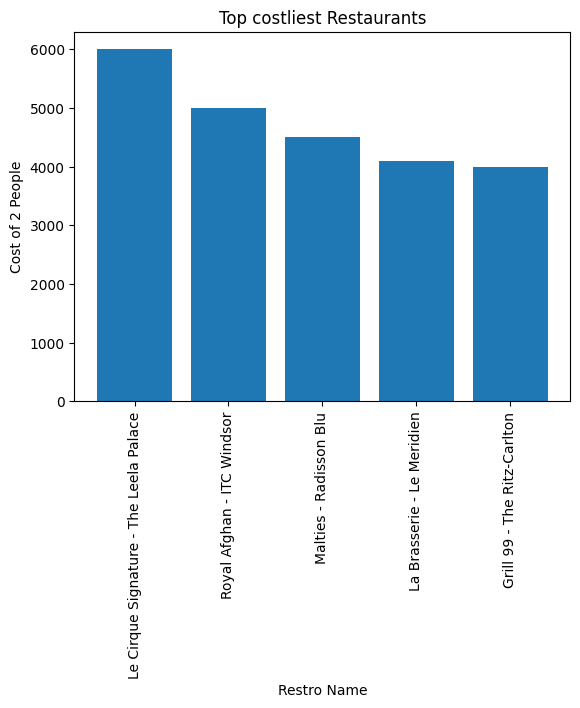

In [ ]:
plt.bar(temp_df["name"] , temp_df["cost"])
plt.xticks(rotation = "vertical")
plt.ylabel("Cost of 2 People")
plt.xlabel("Restro Name")
plt.title("Top costliest Restaurants")

The Leela Palace is most costliest Restaurant

In [ ]:
import re

likes = []
for i in range(df.shape[0]):
    dish_liked = df["dish_liked"][i]
    if isinstance(dish_liked, str):
        array_split = re.split(",", dish_liked)
        for item in array_split:
            likes.append(item)


In [ ]:
fav_dish = pd.Series(likes).value_counts()[:25]
fav_dish

In [ ]:
plt.figure(figsize = (10,4))
sns.barplot(x = fav_dish.index , y = fav_dish.values)
plt.xticks(rotation = "vertical")
plt.xlabel("Name of Dish")
plt.show()



Pasta is most liked dish among the People


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400, background_color="black")
wordcloud.generate_from_frequencies(fav_dish)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
import re

cuisines = []
for i in range(df.shape[0]):
    dish_liked = df["cuisines"][i]
    if isinstance(dish_liked, str):
        array_split = re.split(",", dish_liked)
        for item in array_split:
            cuisines.append(item)

In [ ]:
fav_cuisines = pd.Series(cuisines).value_counts()[:25]
fav_cuisines

In [ ]:
plt.figure(figsize = (10,4))
sns.barplot(x = fav_cuisines.index , y = fav_cuisines.values , palette = "CMRmap_r")
plt.xticks(rotation = "vertical")
plt.xlabel("Name of Dish")
plt.show()


Chinese and North Indian are the most popular cuisines

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="red")
wordcloud.generate_from_frequencies(fav_cuisines)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Preparing Machine Learning Model

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# powerful tool for evaluating the performance of machine learning models.
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df.dropna(inplace = True)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

Mlb = MultiLabelBinarizer()

In [ ]:
# Extract features from the 'rest_type' column
df['rest_type'] = df['rest_type'].apply(lambda x: x.lower())
df['rest_type_count'] = df['rest_type'].apply(lambda x: len(x.split(', ')))

In [ ]:
df['type'] = df['type'].apply(lambda x: x.lower())

In [ ]:
df.reset_index(drop = True , inplace = True)

In [ ]:
df["rate"].max()

4.9

In [ ]:
def create_target(r):
  if r >= 2 and r <= 2.5:
    return 0
  elif r > 2.5 and r <= 3:
    return 1
  elif r > 3 and r <= 3.5:
    return 2
  elif r > 3.5 and r <= 4:
    return 3
  else:
    return 4

In [ ]:
df["target"] = df["rate"].apply(create_target)

In [ ]:
df['target'].value_counts()

3    10247
4     6470
2     1390
1     1063
0      166
Name: target, dtype: int64

In [ ]:
df.drop(columns = ["name" , "dish_liked" , "rest_type" , "cuisines","reviews_list" ,"menu_item" ] , axis = 1 , inplace = True)

In [ ]:
Cat_feature = df.select_dtypes(include="object_")

In [ ]:
for feature in Cat_feature:
  print(f"Featuer {feature} has {Cat_feature[feature].nunique()} unique values")

Featuer online_order has 2 unique values
Featuer book_table has 2 unique values
Featuer location has 87 unique values
Featuer type has 7 unique values
Featuer city has 30 unique values


In [ ]:
df_location_count = df["location"].value_counts(normalize=True) * 100
df_location_count

BTM                      6.940422
Koramangala 5th Block    6.655978
Indiranagar              5.642325
HSR                      5.202731
Jayanagar                4.897600
                           ...   
Rajarajeshwari Nagar     0.010343
Yelahanka                0.010343
West Bangalore           0.010343
Kanakapura Road          0.005172
KR Puram                 0.005172
Name: location, Length: 87, dtype: float64

In [ ]:
Desired_index = df_location_count[df_location_count.values > 0.5].index
Desired_index

Index(['BTM', 'Koramangala 5th Block', 'Indiranagar', 'HSR', 'Jayanagar',
       'JP Nagar', 'Whitefield', 'Koramangala 7th Block',
       'Koramangala 6th Block', 'Marathahalli', 'Koramangala 4th Block',
       'MG Road', 'Brigade Road', 'Ulsoor', 'Bannerghatta Road', 'Bellandur',
       'Koramangala 1st Block', 'Kalyan Nagar', 'Residency Road',
       'Banashankari', 'Sarjapur Road', 'Church Street', 'Malleshwaram',
       'Richmond Road', 'Lavelle Road', 'Electronic City', 'Cunningham Road',
       'Basavanagudi', 'Brookefield', 'New BEL Road', 'Frazer Town',
       'Kammanahalli', 'St. Marks Road', 'Domlur', 'Old Airport Road',
       'Banaswadi', 'Jeevan Bhima Nagar', 'Rajajinagar', 'Commercial Street',
       'Shanti Nagar', 'Koramangala 3rd Block', 'Koramangala 8th Block',
       'Vasanth Nagar'],
      dtype='object')

In [ ]:
def Reduce_location(r):
  if r in Desired_index:
    return r
  else:
    return "other"

In [ ]:
df["location"] = df["location"].apply(Reduce_location)

In [ ]:
df['location']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
19331      Whitefield
19332      Whitefield
19333      Whitefield
19334      Whitefield
19335           other
Name: location, Length: 19336, dtype: object

In [ ]:
df_location_count = df["city"].value_counts(normalize=True) * 100
df_location_count

BTM                      6.314646
Koramangala 7th Block    5.880223
Koramangala 4th Block    5.776789
Koramangala 5th Block    5.394084
Koramangala 6th Block    5.073438
Jayanagar                4.892429
Indiranagar              4.556268
Church Street            4.230451
Brigade Road             4.028755
MG Road                  3.920149
Lavelle Road             3.583988
JP Nagar                 3.532271
Residency Road           3.320232
Old Airport Road         3.196111
HSR                      3.139222
Basavanagudi             2.896152
Brookefield              2.709971
Whitefield               2.699628
Marathahalli             2.596194
Bannerghatta Road        2.466901
Frazer Town              2.461729
Kalyan Nagar             2.342780
Malleshwaram             2.270376
Kammanahalli             2.249690
Bellandur                2.208316
Sarjapur Road            2.104882
Banashankari             1.794580
Rajajinagar              1.623914
Electronic City          1.463591
New BEL Road  

In [ ]:
Encoder = ColumnTransformer(transformers=[("OHE",OneHotEncoder(sparse=False , drop="first" ), ["online_order" , "book_table","type"]) , ("BE",BinaryEncoder() , ["location" , "city"] )] , remainder = "passthrough")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , DecisionTreeClassifier()))
pipeline = Pipeline(steps=steps)

In [ ]:
df.drop(columns = ["rate"]  , inplace = True)

In [ ]:
X =df.drop("target" , axis=1)
y =df["target"]

In [ ]:
results_f1 = cross_validate(pipeline, X, y, cv=5, scoring='f1_macro', return_train_score=True , error_score='raise')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
# use precision score as the scoring metric
results_precision = cross_validate(pipeline, X, y, cv=5, scoring='precision_macro', return_train_score=True , n_jobs =-1)

In [ ]:
print(results_precision["train_score"].mean())

0.9968506850012862


In [ ]:
print(results_precision["test_score"].mean())

0.66167112970243


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop("target", axis=1)
y = df["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 5)
pipeline.fit(X_train, y_train)
pre = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pre , y_test)

0.8841778697001034

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)
pipeline.fit(X_train, y_train)

# Create a loop to accept user input and make predictions
while True:
    online_order = input("Online Order (Yes/No): ")
    book_table = input("Book Table (Yes/No): ")
    location = input("Location: ")
    city = input("City: ")
    type1 = input("type: ")
    votes = int(input("votes: "))
    cost = int(input("cost: "))
    rest_type_count = int(input('rest_type_count: '))

    # Create a new DataFrame with the user's input
    new_data = pd.DataFrame({
        "online_order": [online_order],
        "book_table": [book_table],
        "location": [location],
        "votes":[votes],
        "cost":[cost],
        "type":[type1],
        "city": [city],
        "rest_type_count":[rest_type_count]
    })

    # Make predictions for the user's input
    prediction = pipeline.predict(new_data)

    print("Predicted Target:", prediction[0])

    # Ask the user if they want to continue or exit
    continue_input = input("Do you want to continue (Yes/No)? ").lower()
    if continue_input != 'yes':
        break